In [ ]:
from google.colab import drive
drive.mount('gdrive')
%cd /content/gdrive/'My Drive'/Dataset/Assignment2/

Mounted at gdrive
/content/gdrive/My Drive/Dataset/Assignment2


In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import seaborn as sn
from sklearn import metrics
from scipy.special import expit
import joblib

## load dataset1

In [ ]:
loaddata = sio.loadmat('dataset_1.mat')

In [ ]:
data = loaddata['samples']
labels = loaddata['labels']
print(data.ndim)
print(data.shape)
print(labels.ndim)
print(labels.shape)
print(labels[0].T.shape)
print(data)
print(labels)

2
(5000, 2)
2
(1, 5000)
(5000,)
[[ 0.03740109  0.08861641]
 [ 0.57277163 -0.40655467]
 [ 0.27458618 -0.11676833]
 ...
 [ 1.0391683  -0.55422727]
 [ 0.1355146  -0.01042329]
 [ 1.15340485 -0.48205253]]
[[1 1 1 ... 1 1 1]]


## Shape change

In [ ]:
#data2 = np.hsplit(data1,2)
xaxis = []
yaxis = []
for x in data:
  xaxis.append(x[0])
  yaxis.append(x[1])
print(len(xaxis))

5000


## Plot

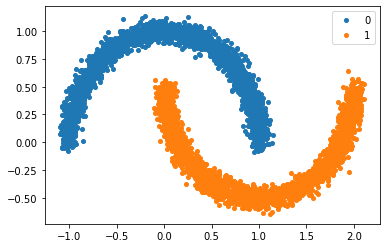

In [ ]:
df = pd.DataFrame(dict(x=xaxis, y=yaxis, label=labels[0]))
groups = df.groupby('label')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
ax.legend()
plt.show()

# Log regression Class

In [ ]:
class LogRegression(object):
    """docstring for LogRegression."""
    def __init__(self, arg, lr=0.01, num_iter=10000, fit_intercept=True, verbose=True):
        super(LogRegression, self).__init__()
        self.arg = arg
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    def __accuracy(self, h, y):
        return (h == y).mean()
    """You can give any required inputs to the fit()"""
    def fit(self, X, y, Xvalid, yvalid):
      tloss = []
      tacc = []
      vloss = []
      vacc = []
      if self.fit_intercept:
          X = self.__add_intercept(X)
          Xvalid = self.__add_intercept(Xvalid)
        
        # weights initialization
      self.theta = np.zeros(X.shape[1])
    
      for i in range(self.num_iter):
          z = np.dot(X, self.theta)
          h = self.__sigmoid(z)
          gradient = np.dot(X.T, (h - y)) / y.size
          self.theta -= self.lr * gradient
            
          if(self.verbose == True and i%100 == 0):
              z1 = np.dot(X, self.theta)
              h1 = self.__sigmoid(z1)
              z2 = np.dot(Xvalid, self.theta)
              h2 = self.__sigmoid(z2)
              tloss.append(self.__loss(h1, y))
              tacc.append(self.__accuracy(np.round_(h1), y))
              vloss.append(self.__loss(h2, yvalid))
              vacc.append(self.__accuracy(np.round_(h2), yvalid))
      return tacc, tloss, vacc, vloss


    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return np.round(self.predict_prob(X))

## Train Test Split

In [ ]:
def traintestsplit(df):
  shuffle = np.random.permutation(len(df))
  #print(shuffle)
  test_size = int(len(df) * 0.2)
  set1 = shuffle[:test_size]
  set2 = shuffle[test_size:test_size*2]
  set3 = shuffle[test_size*2:test_size*3]
  set4 = shuffle[test_size*3:test_size*4]
  set5 = shuffle[test_size*4:]
  dataset1 = df.iloc[set1]
  dataset2 = df.iloc[set2]
  dataset3 = df.iloc[set3]
  dataset4 = df.iloc[set4]
  dataset5 = df.iloc[set5]
  return dataset1, dataset2, dataset3, dataset4, dataset5

dataset1, dataset2, dataset3, dataset4, dataset5 = traintestsplit(df)

## X-Y Split

In [ ]:
def againsplit(train, test):
  features = ['x','y']
  xtrain = train[features]
  xtest = test[features]
  ytrain = train.label
  ytest = test.label
  return xtrain, ytrain, xtest, ytest

## Bool to INT

In [ ]:
def booleantoint(x):
  y = []
  for i in range(len(x)):
    if x[i] == True:
      y.append(1)
    else:
      y.append(0)
  return y

### Plot Func

In [ ]:
def plotandsave(acc, loss, name):
  l = len(acc)
  plot_x = []
  for i in range(l):
    plot_x.append(i)
  plt.plot(plot_x, acc, label = "Training")
  plt.plot(plot_x, loss, label = "Validation")
  plt.xlim(0, 100)
  plt.ylim(0.00, 1.00)
  # naming the x axis 
  plt.xlabel('Iteration') 
  # naming the y axis 
  plt.ylabel('%age')
  plt.legend()
  plt.show()
  plt.savefig("2." + name+".png")

## Log Regression function

In [ ]:
def lgregr(xtrain, ytrain, xtest, ytest, i):
  arg = 0
  regr = LogRegression(arg)
  tacc, tloss, vacc, vloss = regr.fit(xtrain, ytrain, xtest, ytest)
  plotandsave(tacc, vacc, "Accuracy" + str(i))
  plotandsave(tloss, vloss, "Loss" + str(i))
  var1 = regr.predict(xtrain)
  var2 = regr.predict(xtest)
  return var1, var2

## 2 (c)

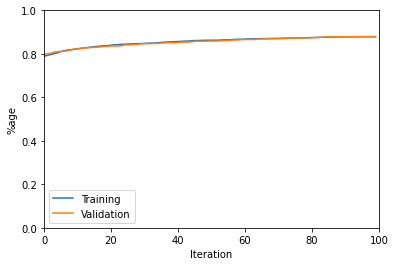

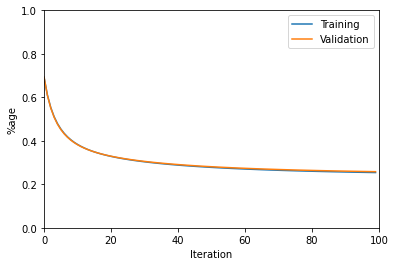

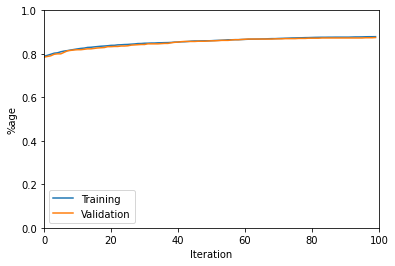

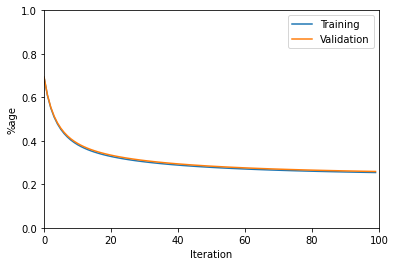

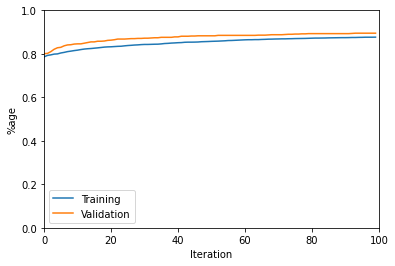

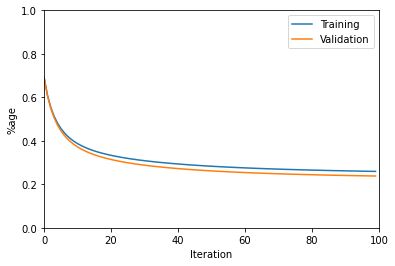

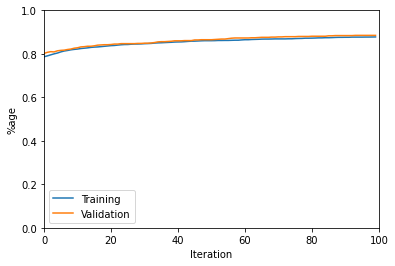

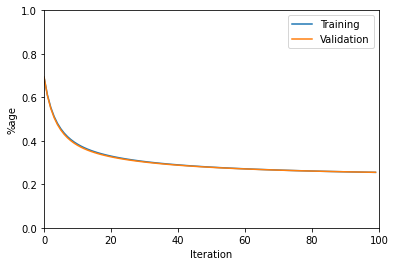

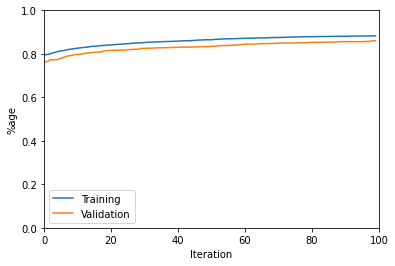

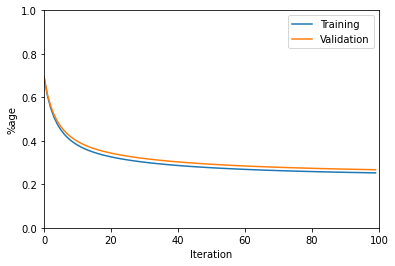

2.Accuracy0.png    2.Loss0.png   2.train2.png  2.valid4.png  3d.ovo03.pkl
2.Accuracy1.png    2.Loss1.png   2.train3.png  3d.ova05.pkl  3d.ovo21.pkl
2.Accuracy2.png    2.Loss2.png   2.train4.png  3d.ova15.pkl  3d.ovo23.pkl
2.Accuracy3.png    2.Loss3.png   2.valid0.png  3d.ova25.pkl  3d.ovo31.pkl
2.Accuracy4.png    2.Loss4.png   2.valid1.png  3d.ova35.pkl  dataset_1.mat
2.L2Accuracy0.png  2.train0.png  2.valid2.png  3d.ovo01.pkl  dataset_2.mat
2.L2Loss0.png      2.train1.png  2.valid3.png  3d.ovo02.pkl  Dataset.data


<Figure size 432x288 with 0 Axes>

In [ ]:
plottrain = []
plottest = []
# datasetall = [dataset1, dataset2, dataset3, dataset4, dataset5]
for i in range(5):
  var = [dataset1, dataset2, dataset3, dataset4, dataset5]
  test = var[i]
  var.pop(i)
  train = pd.concat(var)
  xtrain, ytrain, xtest, ytest = againsplit(train, test)
  pred1, pred2 = lgregr(xtrain, ytrain, xtest, ytest, i)

  plottrain.append(metrics.accuracy_score(ytrain, pred1))
  plottest.append(metrics.accuracy_score(ytest, pred2))

%ls

In [ ]:
print("5fold permomance :")
df = pd.DataFrame()
df['Training'] = plottrain
df['Validation'] = plottest
print(df)


5fold permomance :
   Training  Validation
0   0.87925       0.880
1   0.87950       0.875
2   0.87675       0.895
3   0.87775       0.885
4   0.88250       0.860


## 2d)

In [ ]:
class LogisticRegression(object):    
    def __init__(self, learningRate, numIterations = 10, penalty = None, C = 0.01):
        self.learningRate = learningRate
        self.numIterations = numIterations
        self.penalty = penalty
        self.C = C
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    def __accuracy(self, h, y):
        return (h == y).mean()
        
    def train(self, X_train, y_train, xvalid, yvalid,tol = 10 ** -4):
        tolerance = tol * np.ones([1, np.shape(X_train)[1] + 1])
        self.weights = np.zeros(np.shape(X_train)[1] + 1) 
        X_train = np.c_[np.ones([np.shape(X_train)[0], 1]), X_train]
        self.costs = []
        xvalid = np.c_[np.ones([np.shape(xvalid)[0], 1]), xvalid]
        tacc = []
        tloss = []
        vacc = []
        vloss = []

        for i in range(self.numIterations):
            
            z = np.dot(X_train, self.weights)
            errors = y_train - logistic_func(z)
            if self.penalty is not None:                
                delta_w = self.learningRate * (self.C * np.dot(errors, X_train) + np.sum(self.weights))  
            else:
                delta_w = self.learningRate * np.dot(errors, X_train)
                
            self.iterationsPerformed = i

            if np.all(abs(delta_w) >= tolerance): 
                #weight update
                self.weights += delta_w                                
                #Costs
                if self.penalty is not None:
                    self.costs.append(reg_logLiklihood(X_train, self.weights, y_train, self.C))
                else:
                    self.costs.append(logLiklihood(z, y_train))
            else:
                break
            
            if(1):
              z1 = np.dot(X_train, self.weights)
              h1 = logistic_func(z1)
              z2 = np.dot(xvalid, self.weights)
              h2 = logistic_func(z2)
              tloss.append(self.__loss(h1, y_train))
              tacc.append(self.__accuracy(np.round_(h1), y_train))
              vloss.append(self.__loss(h2, yvalid))
              vacc.append(self.__accuracy(np.round_(h2), yvalid))
            
        return tacc, vacc, tloss, vloss
                    
    def predict(self, X_test, pi = 0.5):   
        z = self.weights[0] + np.dot(X_test, self.weights[1:])        
        probs = np.array([logistic_func(i) for i in z])
        predictions = np.where(probs >= pi, 1, 0)
       
        return predictions, probs
        
    def performanceEval(self, predictions, y_test):
        #Initialize
        TP, TN, FP, FN, P, N = 0, 0, 0, 0, 0, 0
        
        for idx, test_sample in enumerate(y_test):
            
            if predictions[idx] == 1 and test_sample == 1:
                TP += 1       
                P += 1
            elif predictions[idx] == 0 and test_sample == 0:                
                TN += 1
                N += 1
            elif predictions[idx] == 0 and test_sample == 1:
                FN += 1
                P += 1
            elif predictions[idx] == 1 and test_sample == 0:
                FP += 1
                N += 1
            
        accuracy = (TP + TN) / (P + N)                
        sensitivity = TP / P        
        specificity = TN / N        
        PPV = TP / (TP + FP)        
        NPV = TN / (TN + FN)        
        FNR = 1 - sensitivity        
        FPR = 1 - specificity
        
        performance = {'Accuracy': accuracy, 'Sensitivity': sensitivity,
                       'Specificity': specificity, 'Precision': PPV,
                       'NPV': NPV, 'FNR': FNR, 'FPR': FPR}        
      
        return performance
                

def logistic_func(z):   
    return 1 / (1 + np.exp(-z))  
    
def logLiklihood(z, y):
    return -1 * np.sum((y * np.log(logistic_func(z))) + ((1 - y) * np.log(1 - logistic_func(z))))
    
def reg_logLiklihood(x, weights, y, C):
    z = np.dot(x, weights) 
    reg_term = (1 / (2 * C)) * np.dot(weights.T, weights)
    
    return -1 * np.sum((y * np.log(logistic_func(z))) + ((1 - y) * np.log(1 - logistic_func(z)))) + reg_term

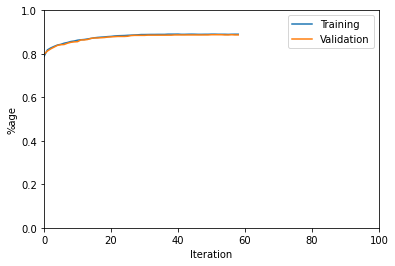

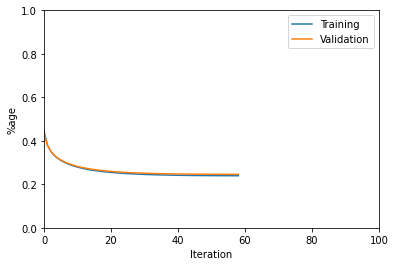

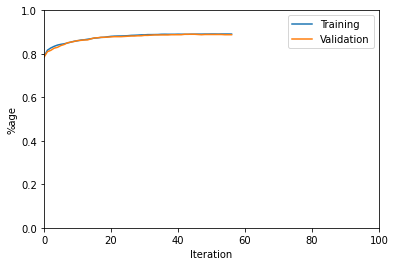

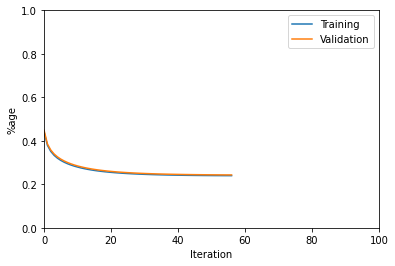

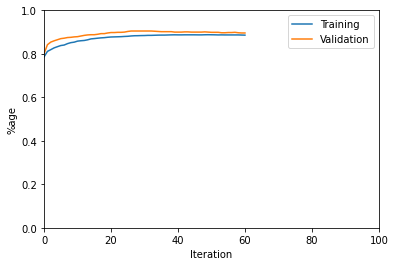

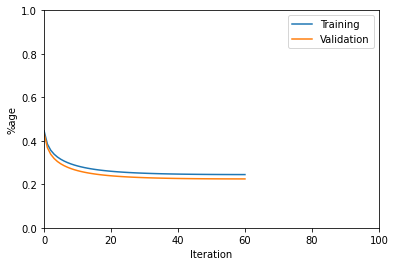

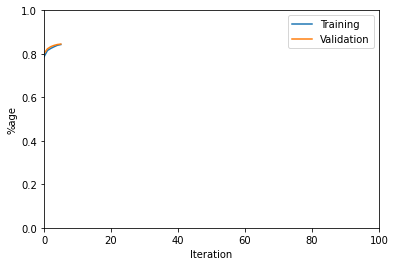

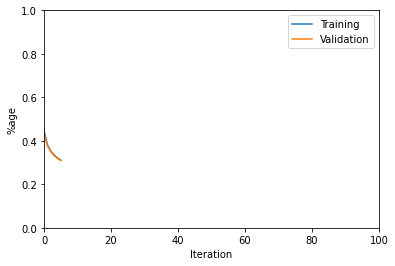

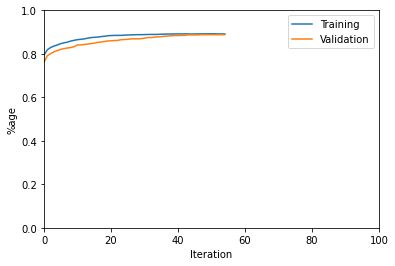

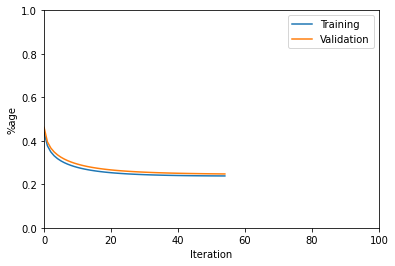

<Figure size 432x288 with 0 Axes>

In [ ]:
plottrain2 = []
plottest2 = []

c = [1, 0.8, 0.5, 0.1, 0.01]

for i in range(5):
  var = [dataset1, dataset2, dataset3, dataset4, dataset5]
  test = var[i]
  var.pop(i)
  train = pd.concat(var)
  xtrain, ytrain, xtest, ytest = againsplit(train, test)
  LR = LogisticRegression(learningRate = 0.01, numIterations = 1000, penalty = 'L2', C = 0.1)  
  tacc, vacc, tloss, vloss = LR.train(xtrain, ytrain, xtest, ytest, tol = 10 ** -4)
  plotandsave(tacc, vacc, "Accuracy" + str(i))
  plotandsave(tloss, vloss, "Loss" + str(i))

  #Testing fitted model on test data with cutoff probability 50%
  pred1, probs = LR.predict(xtrain, 0.5)
  pred2, probs2 = LR.predict(xtest, 0.5)
  perf1 = LR.performanceEval(pred1, ytrain)
  perf2 = LR.performanceEval(pred2, ytest)
  
  #Print out performance values
  # for key, value in perf1.items():
  #     print('%s : %.2f' % (key, value))
  # for key, value in perf2.items():
  #     print('%s : %.2f' % (key, value))

  plottrain2.append(perf1['Accuracy'])
  plottest2.append(perf2['Accuracy'])

#%ls

In [ ]:
print("5fold permomance :")
df = pd.DataFrame()
df['Training'] = plottrain2
df['Validation'] = plottest2
print(df)

5fold permomance :
   Training  Validation
0   0.89025       0.887
1   0.89100       0.888
2   0.88600       0.896
3   0.84275       0.845
4   0.89150       0.888


## e) Logistic regression from the sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
def sklgregr(xtrain, ytrain, xtest, ytest, i):
  regr = LogisticRegression()
  regr.fit(xtrain, ytrain)
  var1 = regr.predict(xtrain)
  var2 = regr.predict(xtest)
  return var1, var2

In [ ]:
plottrain = []
plottest = []


for i in range(5):
  var = [dataset1, dataset2, dataset3, dataset4, dataset5]
  test = var[i]
  var.pop(i)
  train = pd.concat(var)
  xtrain, ytrain, xtest, ytest = againsplit(train, test)
  pred1, pred2 = sklgregr(xtrain, ytrain, xtest, ytest, i)

  plottrain.append(metrics.accuracy_score(ytrain, pred1))
  plottest.append(metrics.accuracy_score(ytest, pred2))

In [ ]:
print("5fold permomance :")
df = pd.DataFrame()
df['Training'] = plottrain
df['Validation'] = plottest
print(df)

5fold permomance :
   Training  Validation
0   0.89250       0.886
1   0.89100       0.886
2   0.88725       0.906
3   0.89175       0.891
4   0.89250       0.881


In [ ]:
def sklgregrl2(xtrain, ytrain, xtest, ytest, i):
  regr = LogisticRegression(penalty='l2')
  regr.fit(xtrain, ytrain)
  var1 = regr.predict(xtrain)
  var2 = regr.predict(xtest)
  return var1, var2

In [ ]:
plottrain = []
plottest = []


for i in range(5):
  var = [dataset1, dataset2, dataset3, dataset4, dataset5]
  test = var[i]
  var.pop(i)
  train = pd.concat(var)
  xtrain, ytrain, xtest, ytest = againsplit(train, test)
  pred1, pred2 = sklgregrl2(xtrain, ytrain, xtest, ytest, i)

  plottrain.append(metrics.accuracy_score(ytrain, pred1))
  plottest.append(metrics.accuracy_score(ytest, pred2))

In [ ]:
print("5fold permomance :")
df = pd.DataFrame()
df['Training'] = plottrain
df['Validation'] = plottest
print(df)

5fold permomance :
   Training  Validation
0   0.89250       0.886
1   0.89100       0.886
2   0.88725       0.906
3   0.89175       0.891
4   0.89250       0.881
